In [13]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib2
import warnings
warnings.filterwarnings("ignore")
web='https://www.sports-reference.com/olympics/sports/'
req = urllib2.Request(web)
page = urllib2.urlopen(req)
soup = BeautifulSoup(page, "lxml")
table = soup.find("div", { "id" : "div_sports" })

In [14]:
print table

<div class="table_container p402_hide " id="div_sports">
<table class="sortable stats_table" id="sports">
<colgroup><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col><col></col></colgroup>
<thead>
<tr class="" valign="top">
<th align="right" class="ranker sort_default_asc show_partial_when_sorting" data-stat="ranker" tip="Rank">Rk</th>
<th align="left" class="tooltip sort_default_asc" data-stat="sport">Sport</th>
<th align="left" class="tooltip sort_default_asc" data-stat="season">Season</th>
<th align="right" class="tooltip" data-stat="participants">Participants</th>
<th align="right" class="tooltip" data-stat="participants_men">Men</th>
<th align="right" class="tooltip" data-stat="participants_women">Women</th>
<th align="right" class="tooltip" data-stat="countries">Countries</th>
<th align="right" class="tooltip" data-stat="editions">Editions</th>
<th align="right" class="tooltip" data-stat="events">Events</th>
<th align="left" class=

In [15]:
cells=[]
for row in table.findAll("tr"):
    result = row.findAll("td")
    if len(result) == 10:
        dic = {}
        dic["RK"] = result[0].get_text()
        dic["Sport"] = result[1].get_text()
        dic["Season"] = result[2].get_text()
        dic["Participants"] = result[3].get_text()
        dic["Men"] = result[4].get_text()
        dic["Women"] = result[5].get_text()
        dic["Countries"] = result[6].get_text()
        dic["Editions"] = result[7].get_text()
        dic["Events"] = result[8].get_text()
        dic["Top_medalists"] = result[9].get_text()
        cells.append(dic)

In [16]:
data=pd.DataFrame(cells)

In [17]:
data

,Countries,Editions,Events,Men,Participants,RK,Season,Sport,Top_medalists,Women
0,1,1,1,1,1,1,Summer,Aeronautics,Hermann Schreiber (1 medal),0
1,101,19,10,"1,739","2,735",2,Winter,Alpine Skiing,Kjetil AndrÃ© Aamodt (8 medals),996
2,6,3,1,24,25,3,Summer,Alpinism,25 athletes with 1 medal,1
3,98,16,29,613,"1,113",4,Summer,Archery,Hubert Van Innis (10 medals),500
4,51,7,29,"1,610","1,814",5,Summer,Art Competitions,Josef Petersen and Alex Walter Diggelmann (3...,204
5,227,29,83,"15,541","22,074",6,Summer,Athletics,Paavo Nurmi (12 medals),"6,527"
6,69,7,5,399,811,7,Summer,Badminton,Gao Ling (4 medals),412
7,16,6,1,761,762,8,Summer,Baseball,Pedro Luis Lazo (4 medals),0
8,66,19,2,"2,481","3,413",9,Summer,Basketball,Teresa Edwards (5 medals),932
9,1,1,1,2,2,10,Summer,Basque Pelota,Francisco Villota and JosÃ© de AmÃ©zola (1 m...,0


In [18]:
data.to_csv(r'sports.txt', header=True, index=None, sep=',', mode='a', encoding='utf-8')

In [19]:
data['Participants']=data['Participants'].apply(lambda st: int(st.replace(',','')))

In [20]:
summer_df=data.sort_values(by='Participants', ascending=False)[data['Season']=='Summer']

In [21]:
summer_df

,Countries,Editions,Events,Men,Participants,RK,Season,Sport,Top_medalists,Women
5,227,29,83,"15,541",22074,6,Summer,Athletics,Paavo Nurmi (12 medals),"6,527"
54,201,29,55,"5,142",8765,55,Summer,Swimming,Michael Phelps (28 medals),"3,620"
43,101,28,25,"6,204",7689,44,Summer,Rowing,Elisabeta Oleniuc-LipÄ (8 medals),"1,483"
24,92,27,2,"5,427",6177,25,Summer,Football,Christie Pearce-Rampone (4 medals),734
19,145,29,44,"5,104",5819,20,Summer,Cycling,Bradley Wiggins (8 medals),714
13,175,25,15,"5,197",5262,14,Summer,Boxing,9 athletes with 3 medals,65
65,131,28,30,"4,766",4988,66,Summer,Wrestling,&nbsp Wilfried Dietrich (5 medals),222
47,150,27,83,"4,144",4882,48,Summer,Shooting,Carl Osburn (11 medals),737
46,120,26,38,"3,850",4480,47,Summer,Sailing,3 athletes with 5 medals,629
27,93,29,27,"2,636",4135,28,Summer,Gymnastics,Larysa Latynina (18 medals),"1,499"


In [28]:
# Athletics
URLS=['http://www.sports-reference.com/olympics/summer/2016/ATH/',\
      'http://www.sports-reference.com/olympics/summer/2012/ATH/',\
     'http://www.sports-reference.com/olympics/summer/2008/ATH/',\
     'http://www.sports-reference.com/olympics/summer/2004/ATH/',\
     'http://www.sports-reference.com/olympics/summer/2000/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1996/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1992/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1988/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1984/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1980/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1976/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1972/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1968/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1964/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1960/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1956/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1952/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1948/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1936/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1932/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1928/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1924/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1920/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1912/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1908/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1906/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1904/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1900/ATH/',\
     'http://www.sports-reference.com/olympics/summer/1896/ATH/']
years=[2016, 2012, 2008, 2004, 2000, 1996, 1992, 1988, 1984, 1980, 1976, 1972, 1968, 1964, 1960, 1956, 1952,\
      1948, 1936, 1932, 1928, 1924, 1920, 1912, 1908, 1906, 1904, 1900, 1896]

In [29]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [33]:
for i in range(len(URLS)):
    req = urllib2.Request(URLS[i])
    page = urllib2.urlopen(req)
    soup = BeautifulSoup(page, "lxml")
    table = soup.find("div", { "class" : "table_container" })
    A=[]
    B=[]
    C=[]
    D=[]
    E=[]
    for row in table.findAll("tr"):
        result = row.findAll("td")
        if len(result) == 4:
            A.append(result[0].get_text())
            for tag in [result[1]]:
                try:
                    B.append(tag.img['title'])
                except:
                    pass
            for tag in [result[2]]:
                try:
                    C.append(tag.img['title'])
                except:
                    pass
            for tag in [result[3]]:
                try:
                    D.append(tag.img['title'])
                except:
                    pass
            for tag in result:
                try:
                    E.append(tag.img['title'])
                except:
                    pass
    df=pd.DataFrame(A,columns=['Event'])
    df4=pd.DataFrame(B, columns=['Gold'])
    df3=pd.DataFrame(C, columns=['Silver'])
    df2=pd.DataFrame(D, columns=['Bronze'])
    df['Gold Score']=3*np.ones(len(A))
    df['Silver Score']=2*np.ones(len(A))
    df['Bronze Score']=1*np.ones(len(A))
    df=pd.concat([df,df4], axis=1)
    df=pd.concat([df,df3], axis=1)
    df=pd.concat([df,df2], axis=1)
    F=list(set(E))
    Score=[]
    Country=F
    for j in range(len(F)):
        Score.append(sum(df.loc[df['Gold']==F[j]]['Gold Score'])+sum(df.loc[df['Silver']==F[j]]['Silver Score'])\
                  +sum(df.loc[df['Bronze']==F[j]]['Bronze Score']))
    df1=pd.DataFrame(Country, columns=['Country'])
    df1['Score']=Score
    df1['year']=np.repeat(years[i],df1.shape[0])
    df1['Percent']=df1.Score/sum(df1.Score)
    df1.to_csv(r'athletics.txt', header=None, index=None, sep=',', mode='a')

In [34]:
atheletics=pd.read_csv('athletics.txt', header=None)

In [36]:
atheletics.columns=['Country','Score', 'Year', 'Percentage' ]

In [41]:
top_countries=atheletics.sort_values(by=['Year','Score'], ascending=[False,False])['Country'][:10]

In [43]:
top_atheletics=atheletics[atheletics['Country'].isin(top_countries)]

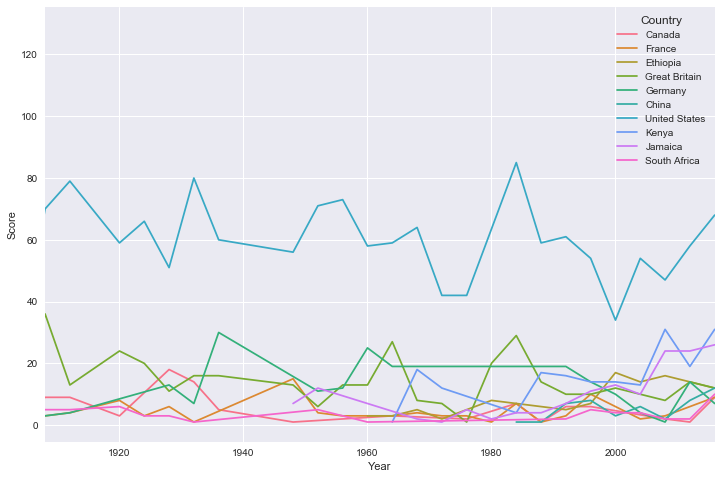

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(12, 8))
sns.tsplot(top_atheletics, time='Year', unit = "Country",condition='Country', value='Score', ax=ax)
plt.show()

In [45]:
# swimming
URLS=['http://www.sports-reference.com/olympics/summer/2016/SWI/',\
      'http://www.sports-reference.com/olympics/summer/2012/SWI/',\
    'http://www.sports-reference.com/olympics/summer/2008/SWI/',\
     'http://www.sports-reference.com/olympics/summer/2004/SWI/',\
     'http://www.sports-reference.com/olympics/summer/2000/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1996/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1992/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1988/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1984/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1980/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1976/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1972/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1968/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1964/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1960/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1956/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1952/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1948/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1936/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1932/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1928/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1924/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1920/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1912/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1908/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1906/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1904/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1900/SWI/',\
     'http://www.sports-reference.com/olympics/summer/1896/SWI/']
years=[2016, 2012,2008, 2004, 2000, 1996, 1992, 1988, 1984, 1980, 1976, 1972, 1968, 1964, 1960, 1956, 1952,\
      1948, 1936, 1932, 1928, 1924, 1920, 1912, 1908, 1906, 1904, 1900, 1896]

In [46]:
for i in range(len(URLS)):
    req = urllib2.Request(URLS[i])
    page = urllib2.urlopen(req)
    soup = BeautifulSoup(page, "lxml")
    table = soup.find("div", { "class" : "table_container" })
    A=[]
    B=[]
    C=[]
    D=[]
    E=[]
    for row in table.findAll("tr"):
        result = row.findAll("td")
        if len(result) == 4:
            A.append(result[0].get_text())
            for tag in [result[1]]:
                try:
                    B.append(tag.img['title'])
                except:
                    pass
            for tag in [result[2]]:
                try:
                    C.append(tag.img['title'])
                except:
                    pass
            for tag in [result[3]]:
                try:
                    D.append(tag.img['title'])
                except:
                    pass
            for tag in result:
                try:
                    E.append(tag.img['title'])
                except:
                    pass
    df=pd.DataFrame(A,columns=['Event'])
    df4=pd.DataFrame(B, columns=['Gold'])
    df3=pd.DataFrame(C, columns=['Silver'])
    df2=pd.DataFrame(D, columns=['Bronze'])
    df['Gold Score']=3*np.ones(len(A))
    df['Silver Score']=2*np.ones(len(A))
    df['Bronze Score']=1*np.ones(len(A))
    df=pd.concat([df,df4], axis=1)
    df=pd.concat([df,df3], axis=1)
    df=pd.concat([df,df2], axis=1)
    F=list(set(E))
    Score=[]
    Country=F
    for j in range(len(F)):
        Score.append(sum(df.loc[df['Gold']==F[j]]['Gold Score'])+sum(df.loc[df['Silver']==F[j]]['Silver Score'])\
                  +sum(df.loc[df['Bronze']==F[j]]['Bronze Score']))
    df1=pd.DataFrame(Country, columns=['Country'])
    df1['Score']=Score
    df1['year']=np.repeat(years[i],df1.shape[0])
    df1['Percent']=df1.Score/sum(df1.Score)
    df1.to_csv(r'swimming.txt', header=None, index=None, sep=',', mode='a')

In [47]:
swimming=pd.read_csv('swimming.txt', header=None)

In [48]:
swimming.columns=['Country','Score', 'Year', 'Percentage' ]

In [49]:
top_countries=swimming.sort_values(by=['Year','Score'], ascending=[False,False])['Country'][:10]

In [50]:
top_swimming=swimming[swimming['Country'].isin(top_countries)]

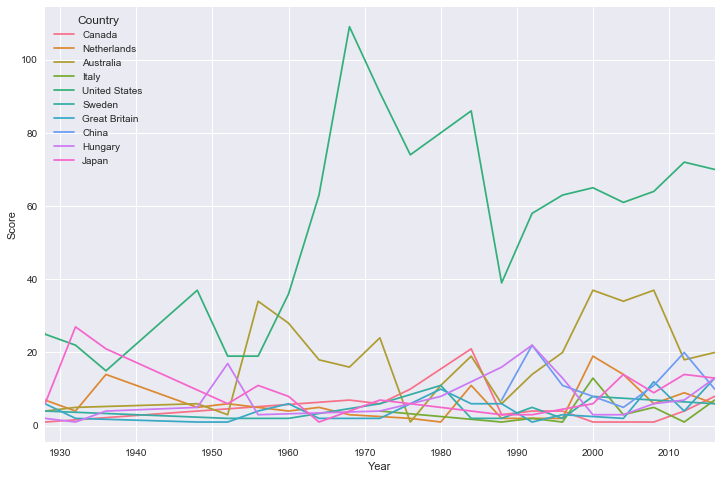

In [52]:
f, ax = plt.subplots(figsize=(12, 8))
sns.tsplot(data = top_swimming, time='Year', unit = "Country",condition='Country', value='Score', ax=ax)
plt.show()